# Loss v/s Epochs

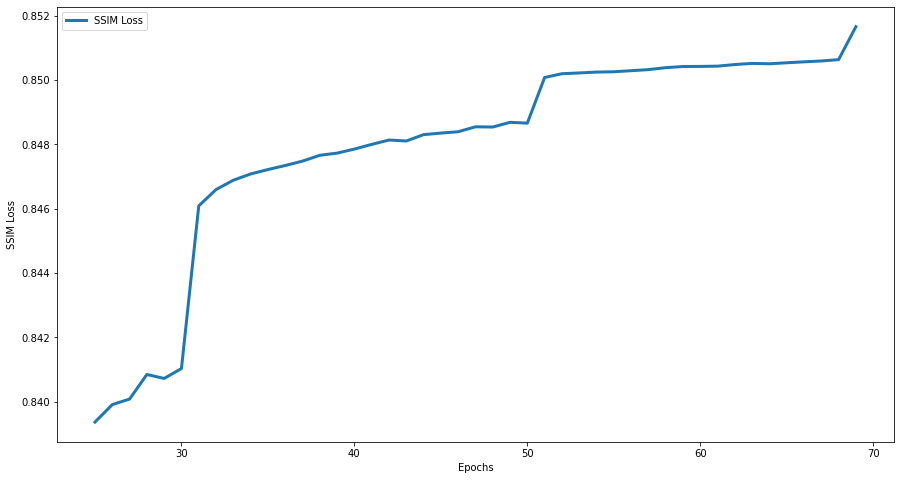

In [1]:
import os
import re
import numpy as np

root_dir = "/home/sb4539/dedrop"
name = "baseline"

with open(os.path.join(root_dir, name, "output.log")) as f:
    outputs = f.readlines()

epoch_loss, loss = {}, []
for line in outputs:
    s = re.search('^^\[[a-zA-Z ]+([\d]+)\]\[[\d]+\/[\d]+\] [a-zA-Z: ]+-([\d.]+),[a-zA-Z :_]+([\d.]+),[a-zA-Z :_]+([\d.]+)', line)
    if s is not None:
        epoch = int(s.group(1))
        if epoch not in epoch_loss:
            epoch_loss[epoch] = []
        epoch_loss[epoch].append(float(s.group(2)))

epoch, mean_loss = [], []
for key in epoch_loss:
    epoch.append(key)
    mean_loss.append(np.mean(epoch_loss[key]))

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,  8))
plt.plot(epoch, mean_loss, linewidth=3)
plt.legend(['SSIM Loss'])
plt.xlabel("Epochs")
plt.ylabel("SSIM Loss")
plt.title("Average Loss per Epoch")
plt.show()

# Sample Outputs

In [2]:
import os
import torch
from models import PReNet

root_dir = "/home/sb4539/dedrop"
name = "baseline"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PReNet().to(device)

checkpoint_path = os.path.join(root_dir, name, "net_epoch68.pth")
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint)
model.eval()

PReNet(
  (conv0): Sequential(
    (0): Conv2d(6, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (res_conv1): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (res_conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (res_conv3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (res_conv4): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (res_conv5): Sequenti

In [3]:
from dataset import get_dataset
from torch.utils.data import DataLoader

test_dataset = get_dataset(phase='test_a')
dataloader = DataLoader(test_dataset, shuffle=True, batch_size=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


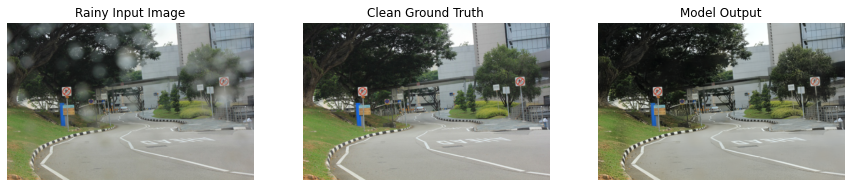

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


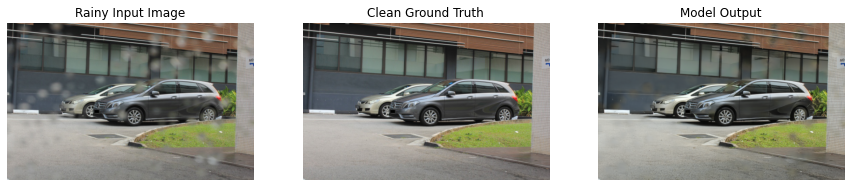

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


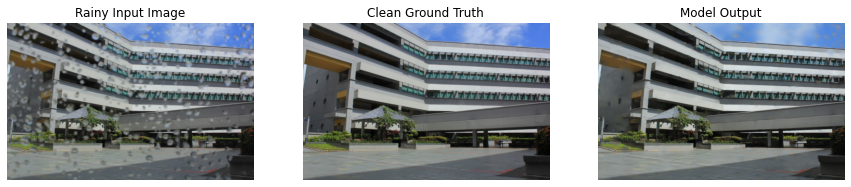

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


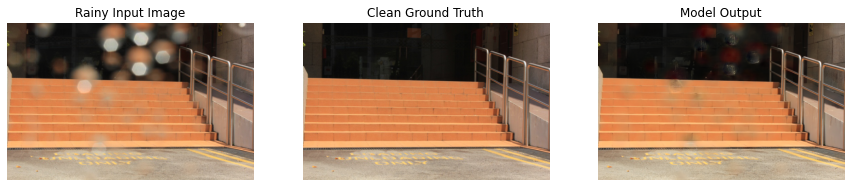

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


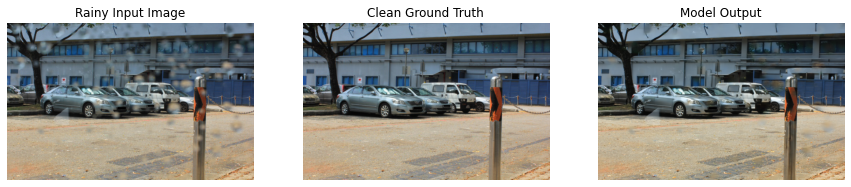

In [4]:
import matplotlib.pyplot as plt

images = 5
for i in range(images):
    (rain, clean) = next(iter(dataloader))
    rain = rain.to(device)
    clean = clean.to(device)
    with torch.set_grad_enabled(False):
        output, _ = model(rain)
    fig, ax = plt.subplots(1, 3, figsize=(15, 8))
    ax[0].set_title("Rainy Input Image")
    ax[1].set_title("Clean Ground Truth")
    ax[2].set_title("Model Output")
    ax[0].imshow(rain[0].detach().cpu().permute(1, 2, 0))
    ax[0].axis('off')
    ax[1].imshow(clean[0].detach().cpu().permute(1, 2, 0))
    ax[1].axis('off')
    ax[2].imshow(output[0].detach().cpu().permute(1, 2, 0))
    ax[2].axis('off')
    plt.show()

# Test Outputs (Test Set A)

In [7]:
from dataset import get_dataset
from torch.utils.data import DataLoader

test_dataset = get_dataset(phase='test_a')
dataloader = DataLoader(test_dataset, shuffle=True, batch_size=1)

In [8]:
import numpy as np
from torch.nn.functional import mse_loss

errors = []
for (rain, clean) in dataloader:
    rain = rain.to(device)
    clean = clean.to(device)
    
    with torch.set_grad_enabled(False):
        output, _ = model(rain)
    
    assert output.size() == clean.size()
    mse_error = mse_loss(output.detach().cpu(), clean.detach().cpu())
    errors.append(mse_error)

print("MSE Error:", np.mean(errors))

MSE Error: 0.0015472464


In [9]:
import numpy as np
from ssim import SSIM

errors = []
ssim = SSIM()
for (rain, clean) in dataloader:
    rain = rain.to(device)
    clean = clean.to(device)
    
    with torch.set_grad_enabled(False):
        output, _ = model(rain)
        
    assert output.size() == clean.size()
    ssim_error = ssim(output.detach().cpu(), clean.detach().cpu())
    errors.append(ssim_error)

print("SSIM Error:", np.mean(errors))

SSIM Error: 0.9235703


# Test Outputs (Test Set B)

In [10]:
from dataset import get_dataset
from torch.utils.data import DataLoader

test_dataset = get_dataset(phase='test_b')
dataloader = DataLoader(test_dataset, shuffle=True, batch_size=1)

In [11]:
import numpy as np
from torch.nn.functional import mse_loss

errors = []
for (rain, clean) in dataloader:
    rain = rain.to(device)
    clean = clean.to(device)
    
    with torch.set_grad_enabled(False):
        output, _ = model(rain)
    
    assert output.size() == clean.size()
    mse_error = mse_loss(output.detach().cpu(), clean.detach().cpu())
    errors.append(mse_error)

print("MSE Error:", np.mean(errors))

MSE Error: 0.0041558505


In [ ]:
import numpy as np
from ssim import SSIM

errors = []
ssim = SSIM()
for (rain, clean) in dataloader:
    rain = rain.to(device)
    clean = clean.to(device)
    
    with torch.set_grad_enabled(False):
        output, _ = model(rain)
        
    assert output.size() == clean.size()
    ssim_error = ssim(output.detach().cpu(), clean.detach().cpu())
    errors.append(ssim_error)

print("SSIM Error:", np.mean(errors))